# Overview Figure of Methow and Tuolumne Watersheds

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
from contextily.tile import warp_img_transform, warp_tiles, _warper
from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
#from mpl_toolkits.basemap import Basemap
import rioxarray as rxr
import rasterio as rio
import datetime

In [2]:
%matplotlib inline

In [4]:
!pwd

/Users/Hannah/Documents/Documents_Grad/Research/IDS_westernUS/SlideRule_tuolumne/notebooks/figure_production


In [10]:
plt.rcParams['font.size'] = '12'

In [3]:
tuol_outline = gpd.read_file('../../../data/site_outlines/UpperTuolRiverBasinOutline.geojson')
met_outline = gpd.read_file('../../../data/site_outlines/methow_outline.geojson')
gm_outline = gpd.read_file('../../../data/site_outlines/gm_outline.geojson')
states = gpd.read_file('../../../data/misc/state_bounds/state_bounds.shp')

In [4]:
import pickle
atl06sr_gdf = pickle.load(open('../../data/ATL06sr/tuolumne_all_sr-atl06-09282022_processed.pkl', 'rb'))
cdec_geom = pickle.load(open('../../data/CDEC/cdec_geometries.pkl', 'rb'))
outline_gdf = pickle.load(open('../../../data/site_outlines/tuolumne_outline_32611.pkl', 'rb'))
tuol_reverse = pickle.load(open('../../../data/misc/tuol_reverse.pkl', 'rb'))

In [5]:
aso_date_list = [datetime.date(2019, 3, 24),
 datetime.date(2019, 4, 17),
 datetime.date(2019, 5, 3),
 datetime.date(2020, 4, 13),
 datetime.date(2020, 5, 22),
 datetime.date(2021, 2, 25),
 datetime.date(2022, 2, 4),
 datetime.date(2022, 4, 5)]

In [6]:
atl06sr_gdf['date_offset'] = np.nan
for date in aso_date_list:
    atl06sr_gdf.loc[atl06sr_gdf['ASO_snowon_date']==date, 'date_offset'] = np.subtract(atl06sr_gdf.loc[atl06sr_gdf['ASO_snowon_date']==date, 'acqdate'],atl06sr_gdf.loc[atl06sr_gdf['ASO_snowon_date']==date,'ASO_snowon_date']).abs().dt.days

In [78]:
atl06sr_gdf['date_offset'].unique()

array([nan, Timedelta('-12 days +00:00:00'),
       Timedelta('-7 days +00:00:00'), Timedelta('11 days 00:00:00'),
       Timedelta('-6 days +00:00:00'), Timedelta('17 days 00:00:00'),
       Timedelta('-17 days +00:00:00'), Timedelta('2 days 00:00:00'),
       Timedelta('-2 days +00:00:00')], dtype=object)

In [8]:
tuol_outline = tuol_outline[0:1]

In [7]:
tuol_outline.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

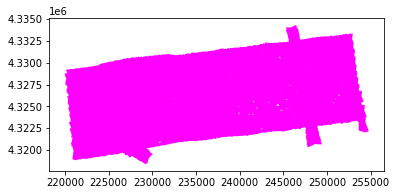

In [13]:
gm_outline.plot(facecolor='magenta')

In [14]:
gm_outline.crs

<Projected CRS: EPSG:32613>
Name: WGS 84 / UTM zone 13N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 108°W and 102°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Northwest Territories (NWT); Nunavut; Saskatchewan. Mexico. United States (USA).
- bounds: (-108.0, 0.0, -102.0, 84.0)
Coordinate Operation:
- name: UTM zone 13N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
met_outline.drop([0,1,2])

,fn,date,geometry
3,./datasetsA/methow_basin_2018/dtm/raw/methow_b...,2018,"POLYGON ((-120.33042 48.80903, -120.33042 48.8..."


In [9]:
met_outline.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
tuol_outline.to_crs('epsg:32611').area / 1e6

0    1181.214
dtype: float64

In [20]:
met_outline.to_crs('epsg:32610').area / 1e6

0    1.655314e-06
1    8.290758e-07
2    8.314041e-07
3    1.792769e+03
dtype: float64

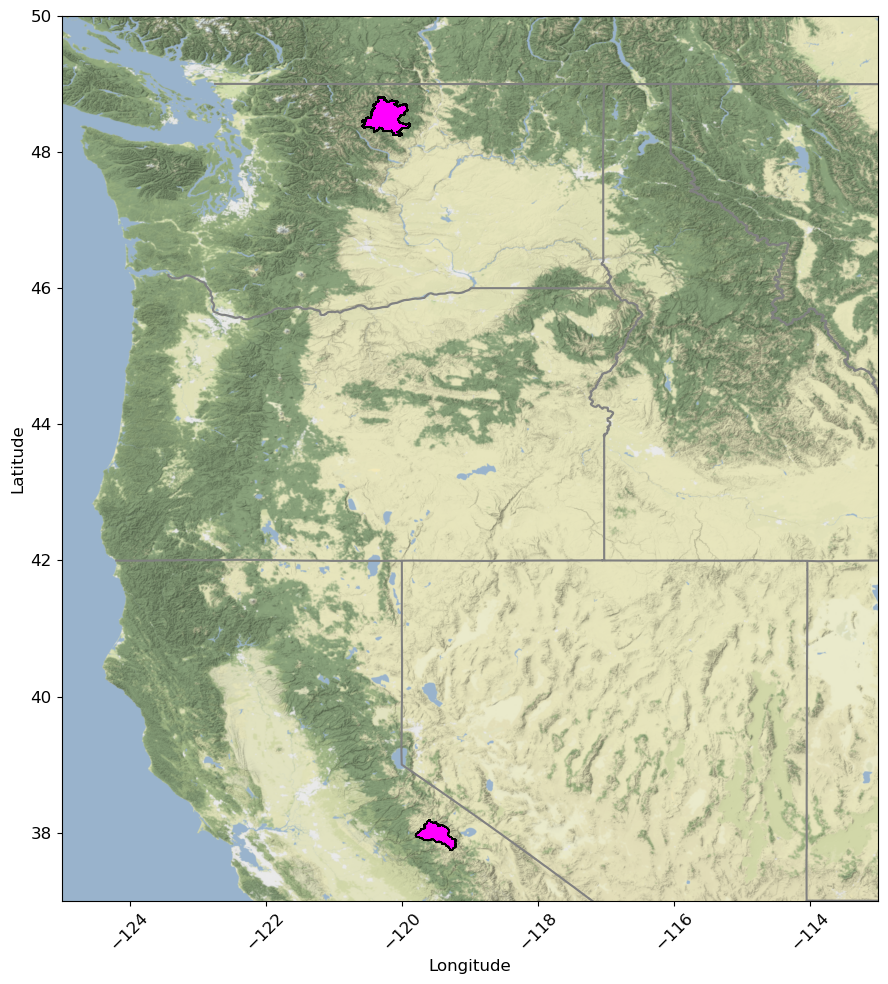

In [11]:
basemap = cx.providers.Stamen.TerrainBackground
extent = ([-125, 37, -113, 50])

f, axa = plt.subplots(figsize=(10,10))

met_outline.plot(ax=axa, facecolor='magenta', edgecolor='k')
tuol_outline.plot(ax=axa, facecolor='magenta', edgecolor='k')
gm_outline.to_crs('epsg:4326').plot(ax=axa, facecolor='magenta', edgecolor='k')
states.plot(ax=axa, edgecolor='gray')

axa.set_xlim(extent[0], extent[2])
axa.set_ylim(extent[1], extent[3])
cx.add_basemap(axa, attribution=False, crs='epsg:4326', source=basemap, zoom=9)
plt.xticks(rotation=45)
axa.set_xlabel('Longitude')
axa.set_ylabel('Latitude')
plt.tight_layout()
plt.savefig('../../figures/polished/tm_sites_map.jpeg',dpi=500)

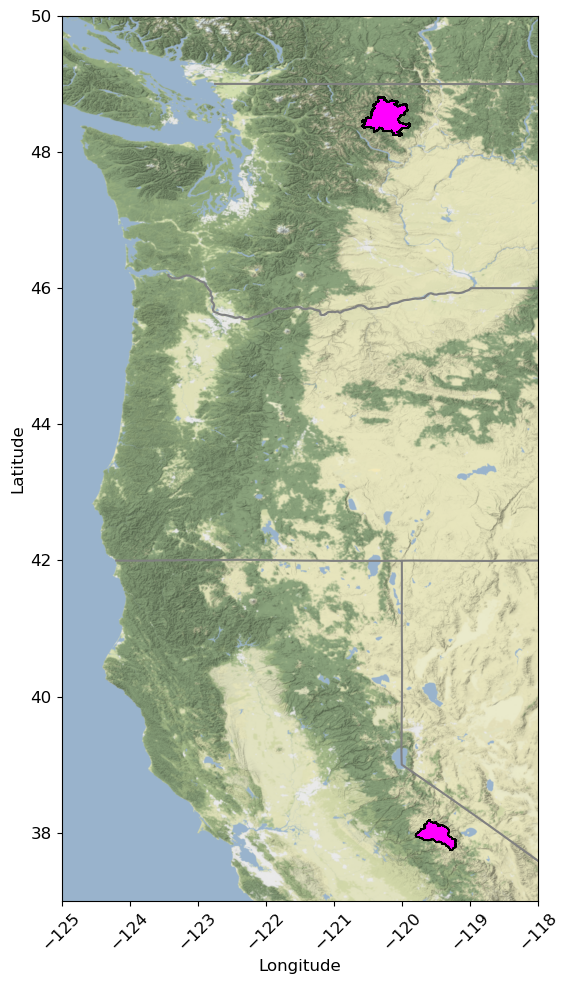

In [12]:
basemap = cx.providers.Stamen.TerrainBackground
extent = ([-125, 37, -118, 50])

f, axa = plt.subplots(figsize=(10,10))

met_outline.plot(ax=axa, facecolor='magenta', edgecolor='k')
tuol_outline.plot(ax=axa, facecolor='magenta', edgecolor='k')
gm_outline.to_crs('epsg:4326').plot(ax=axa, facecolor='magenta', edgecolor='k')
states.plot(ax=axa, edgecolor='gray')

axa.set_xlim(extent[0], extent[2])
axa.set_ylim(extent[1], extent[3])
cx.add_basemap(axa, attribution=False, crs='epsg:4326', source=basemap, zoom=9)
plt.xticks(rotation=45)
axa.set_xlabel('Longitude')
axa.set_ylabel('Latitude')
plt.tight_layout()
plt.savefig('../../figures/polished/tm_sites_map_skinny.jpeg',dpi=500)

In [17]:
coast = gpd.read_file('../../../data/site_outlines/cb_2018_us_nation_5m/cb_2018_us_nation_5m.shp')

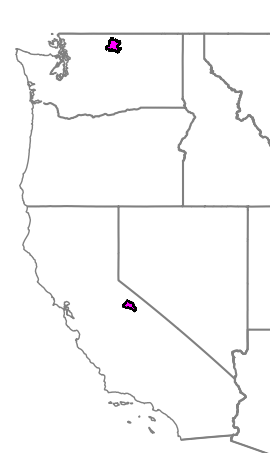

In [23]:
#basemap = cx.providers.Stamen.TerrainBackground
extent = ([-125, 32, -113, 50])

f, axa = plt.subplots()

met_outline.plot(ax=axa, facecolor='magenta', edgecolor='k')
tuol_outline.plot(ax=axa, facecolor='magenta', edgecolor='k')
gm_outline.to_crs('epsg:4326').plot(ax=axa, facecolor='magenta', edgecolor='k')
states.plot(ax=axa, edgecolor='gray')
coast.plot(ax=axa, edgecolor='gray', facecolor='none')
axa.set_xlim(extent[0], extent[2])
axa.set_ylim(extent[1], extent[3])
#cx.add_basemap(axa, attribution=False, crs='epsg:4326', source=basemap, zoom=9)
plt.xticks(rotation=45)
axa.set_axis_off()
axa.set_ylabel('')
plt.tight_layout()
plt.savefig('../../figures/polished/tm_sites_map_skeleton.jpeg',dpi=500)

In [ ]:
basemap = cx.providers.Stamen.TerrainBackground
extent = ([-125, 37, -105, 50])

f, axa = plt.subplots(figsize=(10,10))

met_outline.plot(ax=axa, facecolor='magenta', edgecolor='k')
tuol_outline.plot(ax=axa, facecolor='magenta', edgecolor='k')
gm_outline.to_crs('epsg:4326').plot(ax=axa, facecolor='magenta', edgecolor='k')
states.plot(ax=axa, edgecolor='gray')

axa.set_xlim(extent[0], extent[2])
axa.set_ylim(extent[1], extent[3])
cx.add_basemap(axa, attribution=False, crs='epsg:4326', source=basemap, zoom=9)
plt.xticks(rotation=45)
axa.set_xlabel('Longitude')
axa.set_ylabel('Latitude')
plt.tight_layout()
#plt.savefig('../figures/sites_map.jpeg',dpi=500)

In [139]:
atl06sr_gdf.head()

,distance,h_sigma,rgt,delta_time,pflags,dh_fit_dy,segment_id,w_surface_window_final,dh_fit_dx,h_mean,...,lidar_z_20m,difference_20m,slope_3m,slope_20m,slope_100m,diff_plus,diff_plus_20m,ASO_snowon,ASO_snowon_date,ASO_snowon_20m
time,,,,,,,,,,,,,,,,,,,,,
2018-10-15 23:22:20.018965444,4.215353e+06,0.033182,265,2.488094e+07,0,0.0,210188,3.0,-0.018228,2501.377184,...,2501.780029,-0.402845,1.725123,1.438880,NaN,-0.177670,-0.269368,NaN,NaN,NaN
2018-10-15 23:22:20.021811344,4.215373e+06,0.028329,265,2.488094e+07,0,0.0,210189,3.0,-0.010939,2501.116873,...,2501.500000,-0.383127,4.888882,2.426852,NaN,0.062020,-0.249650,NaN,NaN,NaN
2018-10-15 23:22:20.027481712,4.215413e+06,0.032855,265,2.488094e+07,0,0.0,210191,3.0,-0.000515,2501.053838,...,2501.010010,0.043828,1.540184,1.872145,NaN,-0.011026,0.177305,NaN,NaN,NaN
2018-10-15 23:22:20.030305900,4.215434e+06,0.041974,265,2.488094e+07,0,0.0,210192,3.0,0.008181,2501.176924,...,2501.149902,0.027022,3.003147,1.279436,NaN,0.171875,0.160498,NaN,NaN,NaN
2018-10-15 23:22:20.033126928,4.215454e+06,0.045422,265,2.488094e+07,0,0.0,210193,3.0,0.004802,2501.271832,...,2501.229980,0.041852,3.440679,1.804145,NaN,-0.173158,0.175328,NaN,NaN,NaN


In [69]:
cdec_geom

,geometry,elevation_m,site
0,POINT (293306.562 4194327.335),2621.28,tum
1,POINT (301551.877 4196788.619),2965.00,dan
2,"POLYGON ((298306.562 4194327.335, 298282.486 4...",NaN,tum_5km
3,"POLYGON ((306551.877 4196788.619, 306527.800 4...",NaN,dan_5km


In [115]:
atl06sr_gdf.crs

<Derived Projected CRS: EPSG:32611>
Name: WGS 84 / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 120°W and 114°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Alberta; British Columbia (BC); Northwest Territories (NWT); Nunavut. Mexico. United States (USA).
- bounds: (-120.0, 0.0, -114.0, 84.0)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

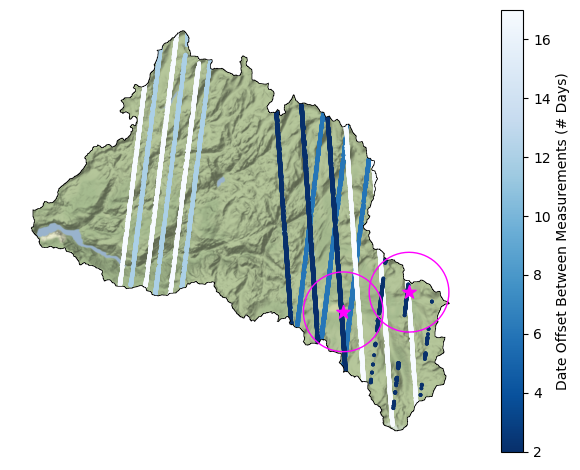

In [144]:
basemap = cx.providers.Stamen.TerrainBackground

fig, ax = plt.subplots()

atl06sr_gdf[atl06sr_gdf['ASO_snowon_date'].isin(aso_date_list)].plot(column='date_offset', cmap='Blues_r', ax=ax, markersize=3, legend=True, legend_kwds={'label':'Date Offset Between Measurements (# Days)'})
outline_gdf.plot(ax=ax, facecolor='none', edgecolor='k')
cx.add_basemap(ax=ax, attribution=False, crs='epsg:32611', source=basemap, zoom=11)
tuol_reverse.plot(ax=ax, facecolor='white')
cdec_geom[0:2].plot(ax=ax, color='magenta', marker='*', markersize=100)
cdec_geom[2:].plot(ax=ax, facecolor='none',edgecolor='magenta')
ax.set_axis_off()
plt.tight_layout()
plt.savefig('../../figures/date_offset_map.jpeg', dpi=300)

In [145]:
methow_dtm = rxr.open_rasterio('../../../data/lidar/methow/dtm/methow_basin_2018_dtm_combined_32610_10m.tif', masked=True).squeeze()
tuol_dtm = rxr.open_rasterio('../../../data/lidar/tuolumne/snow_off/ASO_snowoff_linux/mcc_dem_3p0m_agg_TUOtrimmed_MANUAL_10m_ma_only.tif', masked=True).squeeze()
gm_dtm = rxr.open_rasterio('../../../data/lidar/grandmesa/snowoff/ASO_3M_PCDTM_USCOGM_20160926_20160926.tif', masked=True).squeeze()


In [31]:
tuol_dtm_src = rio.open('../../data/lidar/tuolumne/snow_off/ASO_snowoff_linux/mcc_dem_3p0m_agg_TUOtrimmed_MANUAL_10m_ma_only.tif', masked=True)


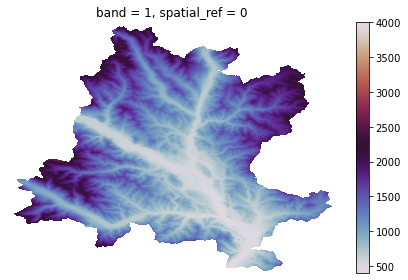

In [45]:
fig, ax = plt.subplots()
methow_dtm.plot(cmap='twilight', ax=ax, vmin=400, vmax=4000)
ax.set_axis_off()
plt.tight_layout()
plt.savefig('../figures/methow_dtm_scale.jpeg', dpi=300, transparent=True)

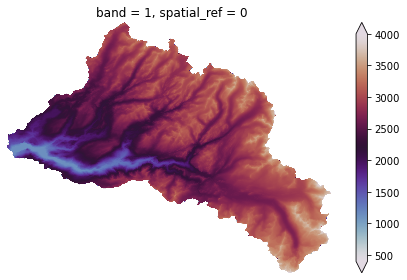

In [44]:
fig, ax = plt.subplots()
tuol_dtm.plot(cmap='twilight', ax=ax, vmin=400, vmax=4000)
ax.set_axis_off()
plt.tight_layout()
plt.savefig('../figures/tuol_dtm_scale.jpeg', transparent=True, dpi=300)
#1188 m to 3965 m

In [35]:
tuol_dtm.min()

<xarray.DataArray ()>
array(-376.15466, dtype=float32)
Coordinates:
    band         int64 1
    spatial_ref  int64 0

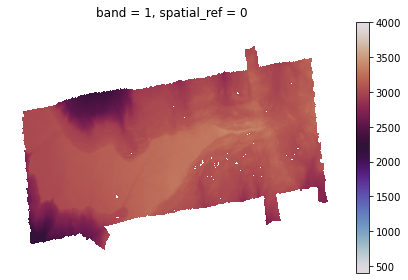

In [47]:
fig, ax = plt.subplots()
gm_dtm.plot(cmap='twilight', ax=ax, vmin=400, vmax=4000)
ax.set_axis_off()
#plt.legend('Elevation (m)')
plt.tight_layout()
plt.savefig('../figures/gm_dtm_scale.jpeg', dpi=300)